In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
from pygimli.physics import ert
from mpl_toolkits.axes_grid1 import make_axes_locatable


# For Jupyter notebooks, use the current working directory
try:
    # For regular Python scripts
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # For Jupyter notebooks
    current_dir = os.getcwd()
# Add the parent directory (OPEN_ERT) to the path
parent_dir = os.path.dirname(os.path.dirname(current_dir))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)


# Import the time-lapse inversion class
from watershed_geophysics.inversion.time_lapse import TimeLapseERTInversion
from watershed_geophysics.inversion.windowed import WindowedTimeLapseERTInversion

In [2]:
data_dir = "results/TL_measurements/appres"

# List of ERT data files testing monthly time-lapse inversion
ert_files = [
    "synthetic_data30.dat",
    "synthetic_data60.dat",
    "synthetic_data90.dat",
    "synthetic_data120.dat",
    "synthetic_data150.dat",
    "synthetic_data180.dat",
    "synthetic_data210.dat",
    "synthetic_data240.dat",
    "synthetic_data270.dat",
    "synthetic_data300.dat",
    "synthetic_data330.dat",
    "synthetic_data360.dat",
]




## 1.Full Time-Lapse Inversion

In [ ]:
##################### FUll Time-Lapse Inversion #####################

# Full paths to data files
data_files = [os.path.join(data_dir, f) for f in ert_files]

# Measurement times (can be timestamps or any sequential numbers representing time)
measurement_times = [1, 2, 3, 4, 5, 6, 7 ,8, 9, 10, 11, 12]  # Adjust based on your actual acquisition times

# Create a mesh for the inversion (or load an existing one)
data = ert.load(data_files[0])
ert_manager = ert.ERTManager(data)
mesh = ert_manager.createMesh(data=data, quality=34)

# Set up inversion parameters
inversion_params = {
    "lambda_val": 50.0,              # Regularization parameter
    "alpha": 10.0,                   # Temporal regularization parameter
    "decay_rate": 0.0,               # Temporal decay rate
    "method": "cgls",                # Solver method ('cgls', 'lsqr', etc.)
    "model_constraints": (0.001, 1e4), # Min/max resistivity values (ohm-m)
    "max_iterations": 15,            # Maximum iterations
    "absoluteUError": 0.0,           # Absolute data error (V)
    "relativeError": 0.05,           # Relative data error (5%)
    "lambda_rate": 1.0,              # Lambda reduction rate
    "lambda_min": 1.0,               # Minimum lambda value
    "inversion_type": "L2"           # 'L1', 'L2', or 'L1L2'
}

# Create the time-lapse inversion object
inversion = TimeLapseERTInversion(
    data_files=data_files,
    measurement_times=measurement_times,
    mesh=mesh,
    **inversion_params
)

# Run the inversion
print("Starting time-lapse inversion...")
result = inversion.run()
print("Inversion complete!")

14/05/25 - 18:48:15 - pyGIMLi - INFO - Found 2 regions.
14/05/25 - 18:48:15 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/05/25 - 18:48:15 - pyGIMLi - INFO - Found 2 regions.
14/05/25 - 18:48:15 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/05/25 - 18:48:15 - pyGIMLi - INFO - Found 2 regions.
14/05/25 - 18:48:15 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/05/25 - 18:48:15 - pyGIMLi - INFO - Found 2 regions.
14/05/25 - 18:48:15 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/05/25 - 18:48:15 - pyGIMLi - INFO - Found 2 regions.
14/05/25 - 18:48:15 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/05/25 - 18:48:15 - pyGIMLi - INFO - Found 2 regions.
14/05/25 - 18:48:15 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/05/25 - 18:48:15 - pyGIMLi - IN

Starting time-lapse inversion...


14/05/25 - 18:48:15 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/05/25 - 18:48:15 - pyGIMLi - INFO - Found 2 regions.
14/05/25 - 18:48:15 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/05/25 - 18:48:15 - pyGIMLi - INFO - Found 2 regions.
14/05/25 - 18:48:15 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/05/25 - 18:48:15 - pyGIMLi - INFO - Found 2 regions.
14/05/25 - 18:48:15 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/05/25 - 18:48:15 - pyGIMLi - INFO - Creating forward mesh from region infos.
14/05/25 - 18:48:15 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
14/05/25 - 18:48:15 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


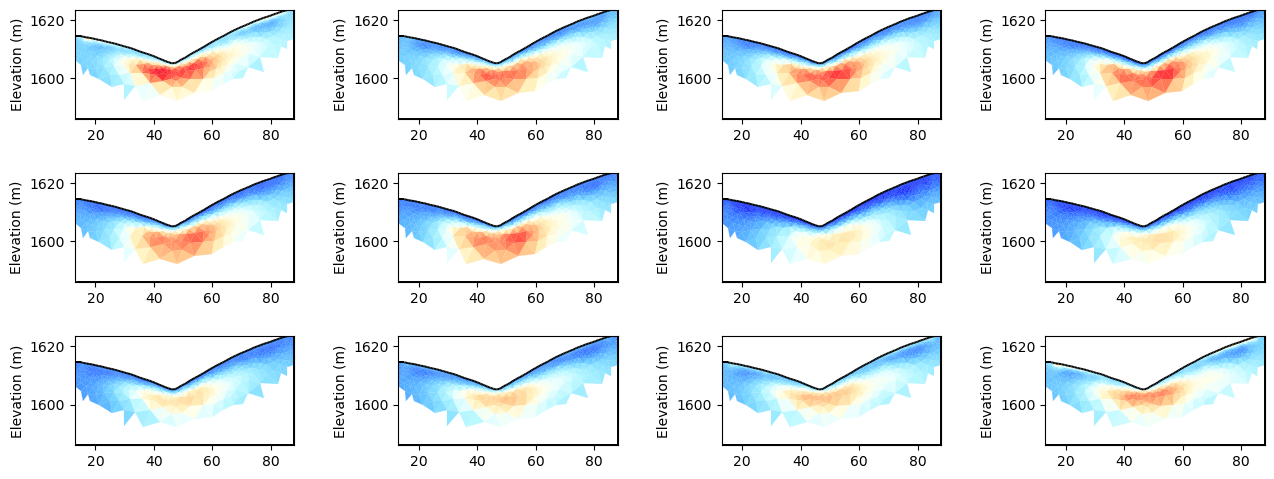

In [ ]:
from palettable.lightbartlein.diverging import BlueDarkRed18_18
fixed_cmap = BlueDarkRed18_18.mpl_colormap

fig = plt.figure(figsize=[16,6])

# True resistivity model
for i in range(12):
    ax = fig.add_subplot(3,4,i+1)
    ax, cbar = pg.show(result.mesh,result.final_models[:,i],pad=0.3,orientation="vertical",cMap=fixed_cmap,cMin= 100,cMax = 3000
                    , ylabel="Elevation (m)",label=' Resistivity ($\Omega$ m)',ax=ax,logScale=False,coverage=result.all_coverage[i]>-1)
    cbar.remove()

## 2. Window time-lapse inversion

In [13]:
# Measurement times (can be timestamps or any sequential numbers representing time)
measurement_times = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  # Adjust based on your actual acquisition times

# Create a mesh for the inversion (or load an existing one)
data = ert.load(os.path.join(data_dir, ert_files[0]))
ert_manager = ert.ERTManager(data)
mesh = ert_manager.createMesh(data=data, quality=34)

# Set up inversion parameters
inversion_params = {
    "lambda_val": 10.0,              # Regularization parameter
    "alpha": 10.0,                   # Temporal regularization parameter
    "decay_rate": 0.0,               # Temporal decay rate
    "method": "cgls",                # Solver method ('cgls', 'lsqr', etc.)
    "model_constraints": (0.001, 1e4), # Min/max resistivity values (ohm-m)
    "max_iterations": 15,            # Maximum iterations
    "absoluteUError": 0.0,           # Absolute data error (V)
    "relativeError": 0.05,           # Relative data error (5%)
    "lambda_rate": 1.0,              # Lambda reduction rate
    "lambda_min": 1.0,               # Minimum lambda value
    "inversion_type": "L2"           # 'L1', 'L2', or 'L1L2'
}

# Define the window size (number of timesteps to process together)
window_size = 3  # A window size of 3 means each window includes 3 consecutive measurements

# Create the windowed time-lapse inversion object
inversion = WindowedTimeLapseERTInversion(
    data_dir=data_dir,               # Directory containing ERT data files
    ert_files=ert_files,             # List of ERT data filenames
    measurement_times=measurement_times,  # List of measurement times
    window_size=window_size,         # Size of sliding window
    mesh=mesh,                       # Mesh for inversion
    **inversion_params               # Pass the same inversion parameters
)

# Run the inversion, optionally in parallel
print("Starting windowed time-lapse inversion...")
result = inversion.run()
print("Inversion complete!")


15/05/25 - 22:31:46 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:31:46 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


Starting windowed time-lapse inversion...

Processing 10 windows sequentially...
Using L2 inversion

Starting L2 inversion for window 0


15/05/25 - 22:31:46 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:31:46 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:31:46 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:31:46 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:31:46 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:31:46 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:31:46 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:31:46 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:31:46 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:31:46 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:31:47 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


15/05/25 - 22:32:00 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:32:00 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:32:00 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
15/05/25 - 22:32:14 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:32:14 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:32:14 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2614.857697445681
dPhi: 1.0
ERTphi_d: 6495306.520455072, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 57.16081813628785
dPhi: 0.9781399889591982
ERTphi_d: 141987.47225053902, ERTphi_m: 2133.036080298267, ERTphi_t: 2019.3763133135326
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 22.555730828444382
dPhi: 0.6053987405382298
ERTphi_d: 56028.43537785584, ERTphi_m: 1094.5596440033623, ERTphi_t: 1990.3847564736102
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 10.932423196136302
dPhi: 0.5153150532214307
ERTphi_d: 27156.139219202574, ERTphi_m: 777.965351646472, ERTphi_t: 2016.1911033497536
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.4113658490140983
dPhi: 0.8709009133937572
ERTphi_d: 3505.83276895102, ERTphi_m: 824.8347148573916, ERTphi_t: 2007.1726087188276
Convergence reached at iteration 4
End of inversion

Window 0 results:
Model shape: 

15/05/25 - 22:34:32 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:34:32 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:34:32 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:34:32 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:34:32 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:34:32 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:34:32 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:34:32 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:34:32 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:34:32 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:34:32 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


15/05/25 - 22:34:46 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:34:46 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:34:46 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
15/05/25 - 22:35:08 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:35:08 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:35:08 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2424.799586453877
dPhi: 1.0
ERTphi_d: 6023202.17275143, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 49.16257907707346
dPhi: 0.9797250958999993
ERTphi_d: 122119.84642745048, ERTphi_m: 2030.4795849075356, ERTphi_t: 201.651217976974
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 24.911445526742924
dPhi: 0.4932844046344965
ERTphi_d: 61880.03068842942, ERTphi_m: 1047.3079821766717, ERTphi_t: 196.0624161585216
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 10.836321549639012
dPhi: 0.5650063125399123
ERTphi_d: 26917.422729303304, ERTphi_m: 683.3625053508786, ERTphi_t: 185.1908770815405
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.221348400183935
dPhi: 0.8872912367366377
ERTphi_d: 3033.8294260568946, ERTphi_m: 749.3196701925683, ERTphi_t: 185.1864162826213
Convergence reached at iteration 4
End of inversion

Window 1 results:
Model shape: (13

15/05/25 - 22:37:10 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:37:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:37:10 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:37:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:37:10 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:37:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:37:10 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:37:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:37:10 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:37:10 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:37:11 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


15/05/25 - 22:37:23 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:37:23 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:37:23 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
15/05/25 - 22:37:34 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:37:34 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:37:34 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2361.2976889094757
dPhi: 1.0
ERTphi_d: 5865463.459251137, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 46.75497488863045
dPhi: 0.9801994576506686
ERTphi_d: 116139.35762335804, ERTphi_m: 2035.5129805900676, ERTphi_t: 271.6096284962324
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 25.440643963184726
dPhi: 0.4558730055190083
ERTphi_d: 63194.55960455086, ERTphi_m: 1048.3008537230035, ERTphi_t: 268.28859592319463
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 10.645668585699873
dPhi: 0.5815487767878333
ERTphi_d: 26443.840766878486, ERTphi_m: 704.7347563062156, ERTphi_t: 261.15584963821
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.3259865391441201
dPhi: 0.8754435638804976
ERTphi_d: 3293.7505632339944, ERTphi_m: 767.1461247272698, ERTphi_t: 258.77372187266786
Convergence reached at iteration 4
End of inversion

Window 2 results:
Model shape:

15/05/25 - 22:40:11 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:40:11 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:40:11 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:40:11 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:40:11 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:40:11 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:40:11 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:40:11 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:40:12 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:40:12 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:40:12 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


15/05/25 - 22:40:25 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:40:25 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:40:25 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
15/05/25 - 22:40:38 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:40:38 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:40:38 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2335.406380855519
dPhi: 1.0
ERTphi_d: 5801149.450045109, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 46.56236201210289
dPhi: 0.9800624155205717
ERTphi_d: 115660.90723806358, ERTphi_m: 2016.20353751592, ERTphi_t: 246.03512504990783
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 25.853160668515688
dPhi: 0.4447626891909884
ERTphi_d: 64219.25110059297, ERTphi_m: 1001.730107997963, ERTphi_t: 247.265840734089
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 10.734818669389535
dPhi: 0.5847773196078677
ERTphi_d: 26665.289574763603, ERTphi_m: 672.0977953717975, ERTphi_t: 239.37050376134653
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.3377810800937169
dPhi: 0.8753792568561577
ERTphi_d: 3323.048202952793, ERTphi_m: 720.2486528918016, ERTphi_t: 238.76794732783978
Convergence reached at iteration 4
End of inversion

Window 3 results:
Model shape: (1

15/05/25 - 22:43:04 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:43:04 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:43:04 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:43:04 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:43:04 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:43:04 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:43:04 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:43:04 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:43:04 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:43:04 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:43:04 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


15/05/25 - 22:43:17 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:43:17 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:43:17 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
15/05/25 - 22:43:30 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:43:30 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:43:30 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2119.5610754349227
dPhi: 1.0
ERTphi_d: 5264989.711380348, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 43.20238154978129
dPhi: 0.9796172981045538
ERTphi_d: 107314.71576965673, ERTphi_m: 2036.5221341430483, ERTphi_t: 1915.4496481624892
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 24.881734234563346
dPhi: 0.424065680131717
ERTphi_d: 61806.22783865535, ERTphi_m: 1012.9286257153796, ERTphi_t: 1887.0098592896923
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 9.43112008007494
dPhi: 0.6209621085424937
ERTphi_d: 23426.902278906153, ERTphi_m: 734.9572817793036, ERTphi_t: 1888.5093405435
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.5054571446618756
dPhi: 0.8403734517342809
ERTphi_d: 3739.555547340099, ERTphi_m: 768.7532640022005, ERTphi_t: 1875.5155811891427
-------------------ERT Iteration: 5 ---------------------------
ERT chi2: 1.1636178076

15/05/25 - 22:46:42 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:46:42 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:46:42 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:46:42 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:46:42 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:46:42 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:46:42 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:46:42 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:46:42 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:46:42 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:46:42 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


15/05/25 - 22:46:55 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:46:55 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:46:55 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
15/05/25 - 22:47:09 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:47:09 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:47:09 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 1950.723115414603
dPhi: 1.0
ERTphi_d: 4845596.218689874, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 41.53089622410737
dPhi: 0.97870999943768
ERTphi_d: 103162.74622068272, ERTphi_m: 2021.0918390262173, ERTphi_t: 1928.277567013302
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 23.365439613077882
dPhi: 0.4373962101132077
ERTphi_d: 58039.75199888546, ERTphi_m: 1051.948782426726, ERTphi_t: 1907.389056225751
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 8.185793503900946
dPhi: 0.6496623372188011
ERTphi_d: 20333.51106368995, ERTphi_m: 756.3352061275749, ERTphi_t: 1917.9891933719005
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.423525794208565
dPhi: 0.8260980082712589
ERTphi_d: 3536.0380728140753, ERTphi_m: 788.4064258658725, ERTphi_t: 1902.320998476443
Convergence reached at iteration 4
End of inversion

Window 5 results:
Model shape: (1364

15/05/25 - 22:49:35 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:49:35 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:49:35 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:49:35 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:49:35 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:49:35 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:49:35 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:49:35 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:49:35 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:49:35 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:49:35 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


15/05/25 - 22:49:48 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:49:48 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:49:48 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
15/05/25 - 22:50:02 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:50:02 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:50:02 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 1883.650824187547
dPhi: 1.0
ERTphi_d: 4678988.6472818665, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 44.842205880294244
dPhi: 0.9761939923766734
ERTphi_d: 111388.0394066509, ERTphi_m: 1953.0466476488505, ERTphi_t: 1358.1071686875966
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 22.494082476869522
dPhi: 0.49837252572013924
ERTphi_d: 55875.30087254389, ERTphi_m: 1037.719534930093, ERTphi_t: 1330.4468639077218
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 7.983986920490176
dPhi: 0.6450627880154683
ERTphi_d: 19832.2235104976, ERTphi_m: 725.591359916193, ERTphi_t: 1345.2436382940418
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.3677787840737277
dPhi: 0.8286847413836002
ERTphi_d: 3397.5624996391393, ERTphi_m: 765.6578559176085, ERTphi_t: 1334.4105232555512
Convergence reached at iteration 4
End of inversion

Window 6 results:
Model shape:

15/05/25 - 22:52:34 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:52:34 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:52:34 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:52:34 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:52:34 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:52:34 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:52:34 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:52:34 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:52:34 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:52:34 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:52:34 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


15/05/25 - 22:52:47 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:52:47 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:52:47 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
15/05/25 - 22:53:00 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:53:00 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:53:00 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2080.9823041318746
dPhi: 1.0
ERTphi_d: 5169160.043463577, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 53.03755272533559
dPhi: 0.9745132130052103
ERTphi_d: 131745.2809697336, ERTphi_m: 1898.2248448036848, ERTphi_t: 1438.175617399694
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 20.89062142670394
dPhi: 0.6061164146300312
ERTphi_d: 51892.30362393259, ERTphi_m: 999.2152432401863, ERTphi_t: 1402.712816862437
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 8.495670167804189
dPhi: 0.5933261153761374
ERTphi_d: 21103.244696825604, ERTphi_m: 668.7739417519608, ERTphi_t: 1397.4989228312888
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.3289734673678675
dPhi: 0.8435704963683451
ERTphi_d: 3301.170092941783, ERTphi_m: 719.3894560331298, ERTphi_t: 1387.919805165879
Convergence reached at iteration 4
End of inversion

Window 7 results:
Model shape: (13

15/05/25 - 22:55:25 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:55:25 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:55:25 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:55:25 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:55:25 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:55:25 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:55:25 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:55:25 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:55:25 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:55:25 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:55:25 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


15/05/25 - 22:55:39 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:55:39 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:55:39 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
15/05/25 - 22:55:52 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:55:52 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:55:52 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2339.9500473783282
dPhi: 1.0
ERTphi_d: 5812435.917687767, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 60.970601228999364
dPhi: 0.9739436312765264
ERTphi_d: 151450.9734528344, ERTphi_m: 1919.202455773409, ERTphi_t: 690.383224033214
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 21.221343935968545
dPhi: 0.6519413699683995
ERTphi_d: 52713.818336945864, ERTphi_m: 944.8081924079404, ERTphi_t: 672.2512854994244
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 9.889636658187687
dPhi: 0.5339768919429503
ERTphi_d: 24565.857458938215, ERTphi_m: 613.2798061392, ERTphi_t: 676.5478401326063
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.2898532045812343
dPhi: 0.8695752686208792
ERTphi_d: 3203.995360179786, ERTphi_m: 661.4095448050218, ERTphi_t: 671.9428421908185
Convergence reached at iteration 4
End of inversion

Window 8 results:
Model shape: (1364,

15/05/25 - 22:58:28 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:58:28 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:58:28 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:58:28 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:58:28 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:58:28 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:58:28 - pyGIMLi - INFO - Found 2 regions.
15/05/25 - 22:58:28 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 22:58:29 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:58:29 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:58:29 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


15/05/25 - 22:58:42 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:58:42 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:58:42 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
15/05/25 - 22:58:55 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 22:58:55 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 22:58:55 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2547.2932024544716
dPhi: 1.0
ERTphi_d: 6327476.314896908, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 62.81492160570144
dPhi: 0.9753405216387437
ERTphi_d: 156032.2652685624, ERTphi_m: 2154.825494641912, ERTphi_t: 930.5126148698452
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 21.7560978107128
dPhi: 0.6536476166080561
ERTphi_d: 54042.14696181059, ERTphi_m: 1116.2144991370583, ERTphi_t: 909.6669957462611
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 10.479415653256403
dPhi: 0.518322828641803
ERTphi_d: 26030.868482688904, ERTphi_m: 804.2013288794192, ERTphi_t: 909.2185143409918
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.3134491624362237
dPhi: 0.8746638929215411
ERTphi_d: 3262.6077194915797, ERTphi_m: 854.9216339799577, ERTphi_t: 905.3648712393847
Convergence reached at iteration 4
End of inversion

Window 9 results:
Model shape: (136

In [14]:
result.final_models = np.array(result.final_models)
result.final_models.shape

(1364, 12)

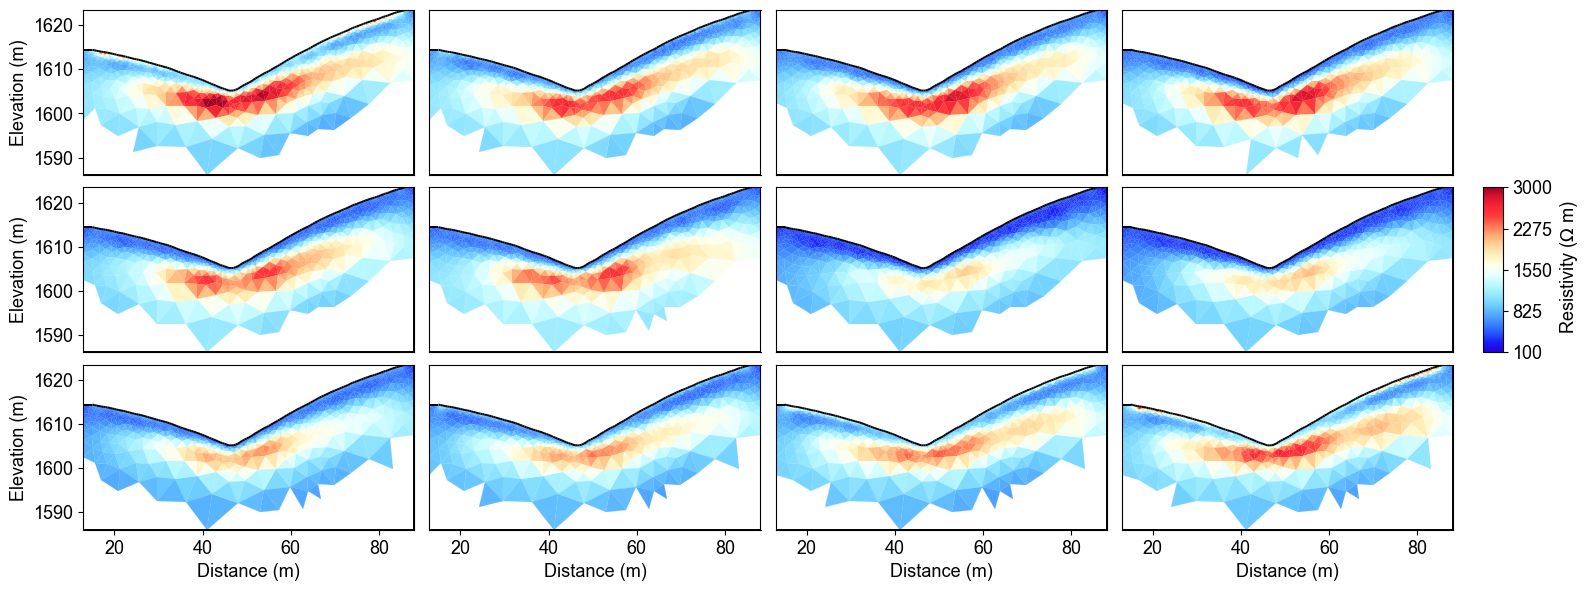

In [ ]:
from palettable.lightbartlein.diverging import BlueDarkRed18_18
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab
params = {'legend.fontsize': 13,
          #'figure.figsize': (15, 5),
         'axes.labelsize': 13,
         'axes.titlesize':13,
         'xtick.labelsize':13,
         'ytick.labelsize':13}

pylab.rcParams.update(params)
plt.rcParams["font.family"] = "Arial"

fixed_cmap = BlueDarkRed18_18.mpl_colormap
fig = plt.figure(figsize=[16, 6])

# Use tight_layout with adjusted parameters to reduce space
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# True resistivity model
for i in range(12):
    row, col = i // 4, i % 4
    ax = fig.add_subplot(3, 4, i+1)
    
    # Add common ylabel only to leftmost panels
    ylabel = "Elevation (m)" if col == 0 else None
    
    # Add resistivity label only to the middle-right panel (row 1, col 3)
    resistivity_label = ' Resistivity ($\Omega$ m)' if (i == 7) else None
    
    # Only show axis ticks on leftmost and bottom panels
    if col != 0:
        ax.set_yticks([])
    
    if row != 2:  # Not bottom row
        ax.set_xticks([])
    else:
        # Add "distance (m)" label to bottom row panels
        ax.set_xlabel("Distance (m)")
    
    # Create the plot
    ax, cbar = pg.show(result.mesh,
                      result.final_models[:,i],
                      pad=0.3,
                      orientation="vertical",
                      cMap=fixed_cmap,
                      cMin=100,
                      cMax=3000,
                      ylabel=ylabel,
                      label=resistivity_label,
                      ax=ax,
                      logScale=False,
                      coverage=result.all_coverage[i]>-1.2)
    
    # Only keep colorbar for the middle-right panel (row 1, col 3)
    # This corresponds to panel index 7 in a 0-based indexing system
    if i != 7:  # Keep only the colorbar for panel 7
        cbar.remove()

plt.tight_layout()
plt.savefig("results/TL_measurements/timelapse_ert.tiff", dpi=300, bbox_inches='tight')

## 3. Full L1 Time-lapse Inversion

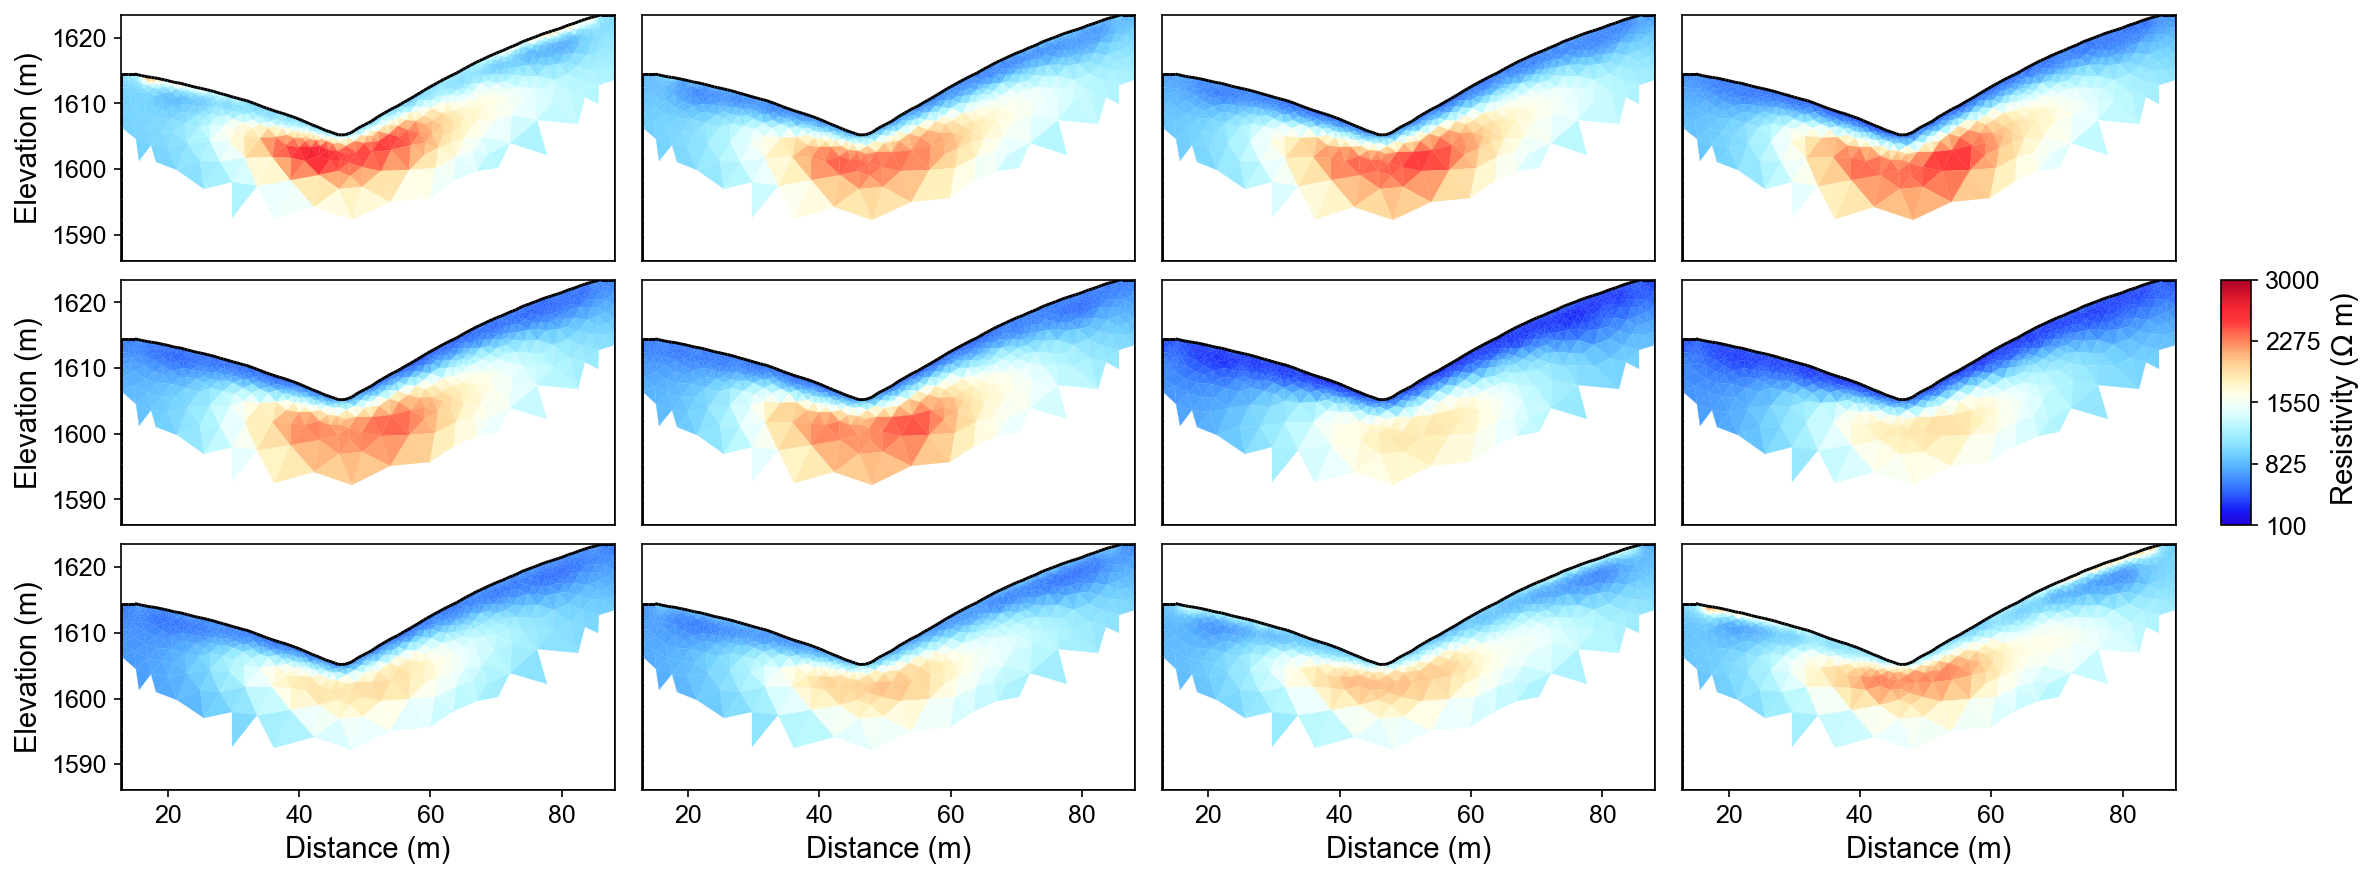

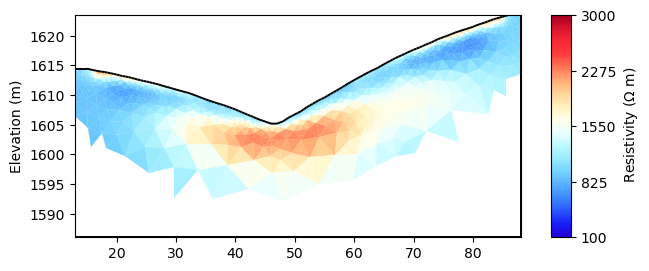

In [ ]:
ax, cbar = pg.show(result.mesh,result.final_models[:,i],pad=0.3,orientation="vertical",cMap=fixed_cmap,cMin= 100,cMax = 3000
                    , ylabel="Elevation (m)",label=' Resistivity ($\Omega$ m)',logScale=False,coverage=result.all_coverage[i]>-1)

In [ ]:
# Full paths to data files
data_files = [os.path.join(data_dir, f) for f in ert_files]

# Measurement times (can be timestamps or any sequential numbers representing time)
measurement_times = [1, 2, 3, 4, 5, 6, 7 ,8, 9, 10, 11, 12]  # Adjust based on your actual acquisition times

# Create a mesh for the inversion (or load an existing one)
data = ert.load(data_files[0])
ert_manager = ert.ERTManager(data)
mesh = ert_manager.createMesh(data=data, quality=34)

# Set up inversion parameters
inversion_params = {
    "lambda_val": 50.0,              # Regularization parameter
    "alpha": 10.0,                   # Temporal regularization parameter
    "decay_rate": 0.0,               # Temporal decay rate
    "method": "cgls",                # Solver method ('cgls', 'lsqr', etc.)
    "model_constraints": (0.001, 1e4), # Min/max resistivity values (ohm-m)
    "max_iterations": 15,            # Maximum iterations
    "absoluteUError": 0.0,           # Absolute data error (V)
    "relativeError": 0.05,           # Relative data error (5%)
    "lambda_rate": 1.0,              # Lambda reduction rate
    "lambda_min": 1.0,               # Minimum lambda value
    "inversion_type": "L1"           # 'L1', 'L2', or 'L1L2'
}

# Create the time-lapse inversion object
inversion = TimeLapseERTInversion(
    data_files=data_files,
    measurement_times=measurement_times,
    mesh=mesh,
    **inversion_params
)

# Run the inversion
print("Starting time-lapse inversion...")
result_L1 = inversion.run()
print("Inversion complete!")

06/05/25 - 20:57:49 - pyGIMLi - INFO - Found 2 regions.
06/05/25 - 20:57:49 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/05/25 - 20:57:51 - pyGIMLi - INFO - Found 2 regions.
06/05/25 - 20:57:51 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/05/25 - 20:57:51 - pyGIMLi - INFO - Found 2 regions.
06/05/25 - 20:57:51 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/05/25 - 20:57:51 - pyGIMLi - INFO - Found 2 regions.
06/05/25 - 20:57:51 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/05/25 - 20:57:51 - pyGIMLi - INFO - Found 2 regions.
06/05/25 - 20:57:51 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/05/25 - 20:57:51 - pyGIMLi - INFO - Found 2 regions.


Starting time-lapse inversion...


06/05/25 - 20:57:51 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/05/25 - 20:57:51 - pyGIMLi - INFO - Found 2 regions.
06/05/25 - 20:57:51 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/05/25 - 20:57:51 - pyGIMLi - INFO - Found 2 regions.
06/05/25 - 20:57:51 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/05/25 - 20:57:52 - pyGIMLi - INFO - Found 2 regions.
06/05/25 - 20:57:52 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/05/25 - 20:57:52 - pyGIMLi - INFO - Found 2 regions.
06/05/25 - 20:57:52 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/05/25 - 20:57:52 - pyGIMLi - INFO - Found 2 regions.
06/05/25 - 20:57:52 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/05/25 - 20:57:52 - pyGIMLi - INFO - Found 2 regions.
06/05/25 - 20:57:52 - pyGIMLi - IN

-6.907755278982137 9.210340371976184
------------------- IRLS Iteration: 1 ---------------------------
-------------------ERT Iteration: 0 ---------------------------


06/05/25 - 20:58:10 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/05/25 - 20:58:10 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
06/05/25 - 20:58:10 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
06/05/25 - 20:58:26 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/05/25 - 20:58:26 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
06/05/25 - 20:58:26 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
06/05/25 - 20:58:42 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/05/25 - 20:58:42 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
06/05/25 - 20:58:42 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
06/05/25 - 20:58:58 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/05/25 - 20:58:58 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward tas

ERT chi2: 2345.302026235805
dPhi: 1.0
ERTphi_d: 9774345.116330786, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 27.889635440014622
dPhi: 0.9881082968726305
ERTphi_d: 796718.945209855, ERTphi_m: 17837.095332572848, ERTphi_t: 3813.0416194231775
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 6.960650703884779
dPhi: 0.7504215959059115
ERTphi_d: 349998.6792501034, ERTphi_m: 30168.917634515106, ERTphi_t: 12984.691488660548
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 3.367077982638705
dPhi: 0.5162696526691793
ERTphi_d: 247935.02965380932, ERTphi_m: 37053.56898735352, ERTphi_t: 17688.69100397912
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 2.339416637669058
dPhi: 0.3052086557746701
ERTphi_d: 211258.74006808683, ERTphi_m: 41537.44334375121, ERTphi_t: 20109.857060454313
-------------------ERT Iteration: 5 ---------------------------
ERT chi2: 1.934822011

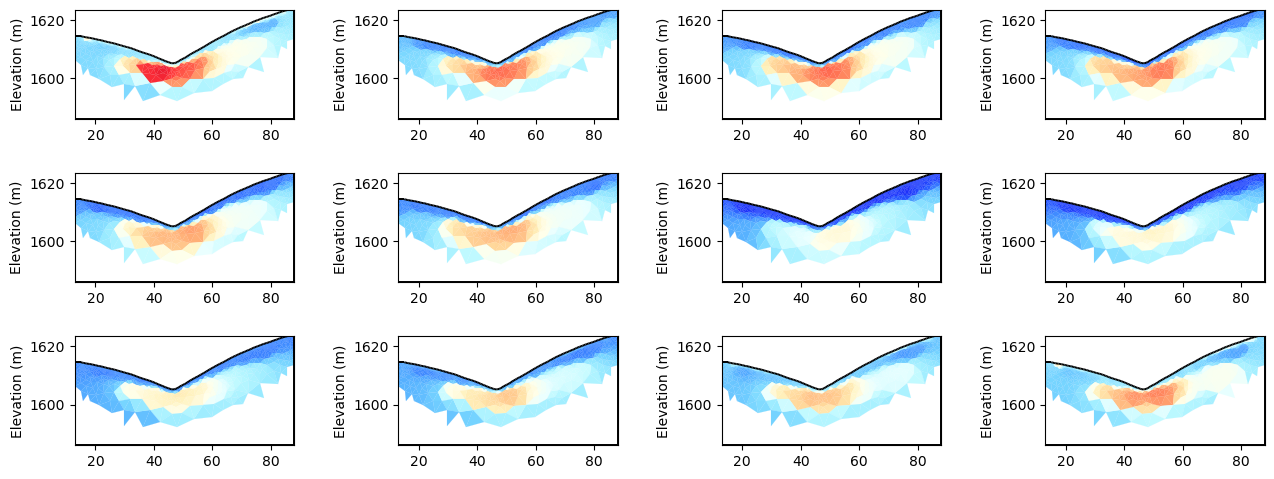

In [ ]:
from palettable.lightbartlein.diverging import BlueDarkRed18_18
fixed_cmap = BlueDarkRed18_18.mpl_colormap

fig = plt.figure(figsize=[16,6])

# True resistivity model
for i in range(12):
    ax = fig.add_subplot(3,4,i+1)
    ax, cbar = pg.show(result_L1.mesh,result_L1.final_models[:,i],pad=0.3,orientation="vertical",cMap=fixed_cmap,cMin= 100,cMax = 3000
                    , ylabel="Elevation (m)",label=' Resistivity ($\Omega$ m)',ax=ax,logScale=False,coverage=result.all_coverage[i]>-1)
    cbar.remove()